In [106]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import os
from collections import Counter

In [107]:
song_features_df = pd.read_pickle('../data/processed/msd_subset_song_features_clean_df.pkl')
# msd_song_features_df = pd.read_pickle('../data/processed/msd_subset_features.pkl')

In [108]:
song_features_df.head()

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,artist_playmeid,danceability,duration,end_of_fade_in,...,time_signature,time_signature_confidence,track_7digitalid,year,is_kanye_song,total_beats,total_bars,total_sections,total_segments,total_tatums
0,22050,29785,0.780462,0.574275,NaN,NaN,-1,0.0,280.21506,0.238,...,5,0.120,2442524,2001,0,799,159,10,843,1597
1,22050,7725,0.687687,0.406686,NaN,NaN,-1,0.0,222.92853,0.000,...,4,1.000,507029,0,0,346,86,10,934,692
2,22050,74269,0.593416,0.395710,50.45663,4.87137,55656,0.0,89.15546,4.847,...,3,0.524,8688607,2010,0,133,41,4,80,399
3,22050,49956,0.815923,0.555138,NaN,NaN,5412,0.0,255.73832,0.156,...,1,1.000,3510188,2000,0,426,426,11,1131,1277
4,22050,25694,0.543937,0.430300,NaN,NaN,6721,0.0,239.59465,0.403,...,3,0.302,6389516,0,0,670,222,11,957,1339


In [109]:
features = [
    'duration',
    'end_of_fade_in',
    'start_of_fade_out',
    'total_bars',
    'total_beats',
    'total_segments',
    'total_tatums',
    'tempo']

In [110]:
from sklearn.cluster import KMeans, DBSCAN

estimator = KMeans(n_clusters=5)
X = song_features_df[features]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

# Save the identified cluster to our DataFrame
song_features_df['cluster'] = pd.Series(labels, index=song_features_df.index)

Counter({0: 3227, 2: 2155, 4: 1938, 1: 586, 3: 69})


In [130]:
song_features_df[song_features_df['is_kanye_song'] == 1].head(10)

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,artist_playmeid,danceability,duration,end_of_fade_in,...,time_signature_confidence,track_7digitalid,year,is_kanye_song,total_beats,total_bars,total_sections,total_segments,total_tatums,cluster
555,22050,822,0.877214,1.082503,NaN,NaN,843,0.0,189.96200,0.197,...,0.432,4658357,2008,1,396,131,7,648,792,0
567,22050,822,0.877214,1.082503,NaN,NaN,843,0.0,204.51220,0.000,...,1.000,3332053,2005,1,318,79,9,1106,1274,4
1085,22050,822,0.877214,1.082503,NaN,NaN,843,0.0,333.34812,0.080,...,1.000,159455,2005,1,608,149,12,1490,1215,4
1890,22050,822,0.877214,1.082503,NaN,NaN,843,0.0,31.32036,0.000,...,0.000,2417332,2005,1,31,31,2,117,154,2
3344,22050,822,0.877214,1.082503,NaN,NaN,843,0.0,271.25506,0.363,...,0.785,334995,2003,1,745,186,11,1209,1490,4
4559,22050,822,0.877214,1.082503,NaN,NaN,843,0.0,46.60200,0.000,...,0.255,23435,2003,1,154,30,3,209,154,2
5569,22050,822,0.877214,1.082503,NaN,NaN,843,0.0,236.72118,0.258,...,1.000,3931254,2010,1,432,105,12,1014,864,0
6364,22050,822,0.877214,1.082503,NaN,NaN,843,0.0,247.64036,2.014,...,0.859,511692,2005,1,333,79,8,1033,999,0
7414,22050,822,0.877214,1.082503,NaN,NaN,843,0.0,31.37261,0.000,...,0.000,159448,2005,1,30,30,2,116,154,2


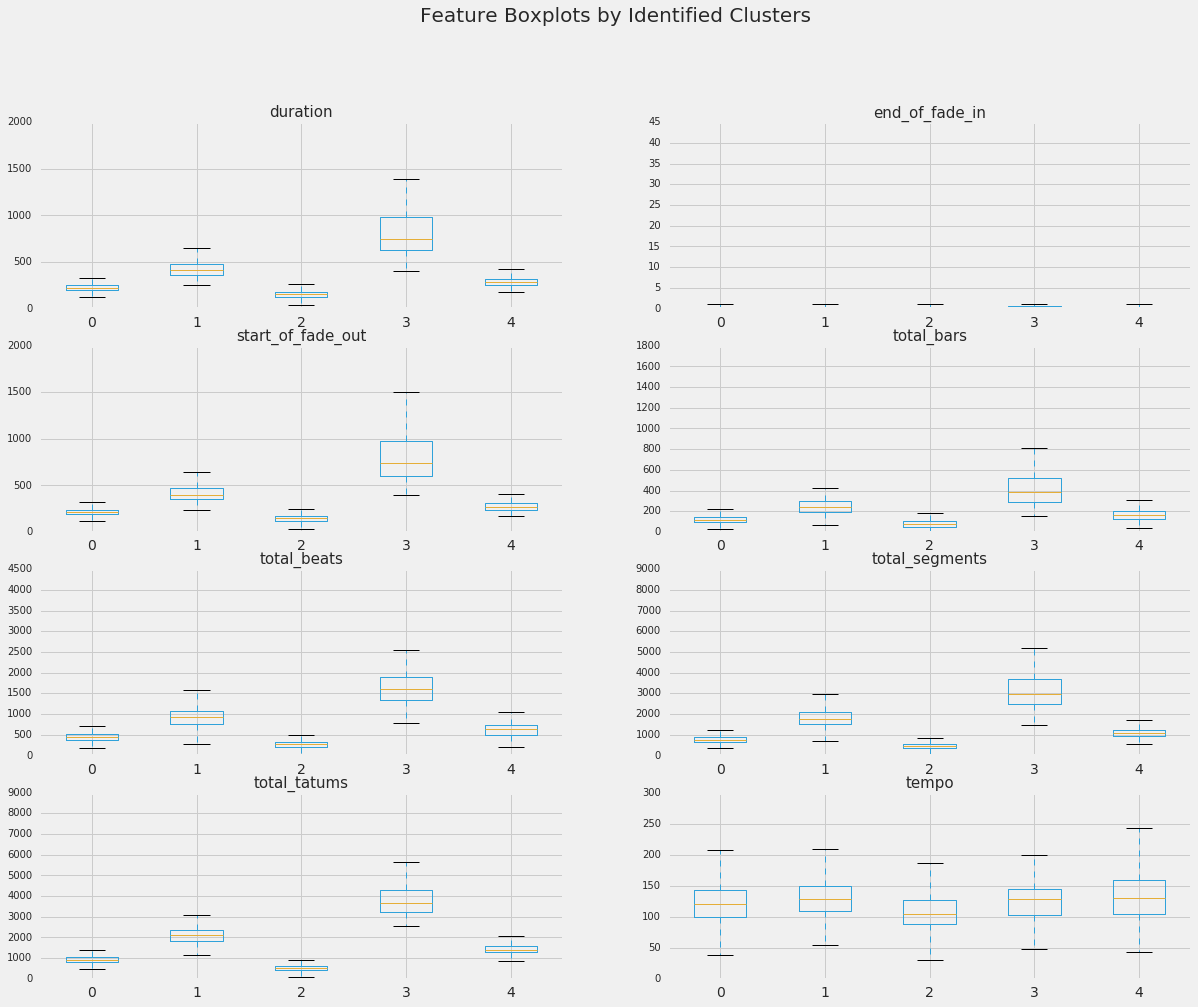

In [112]:
plt.figure(figsize=(20,20))
for i in range(len(features)):
    v = i +1
    ax1 = song_features_df.boxplot(features[i], by='cluster', ax=plt.subplot(5,2,v))
    ax1.set_title(str(features[i]), fontsize=15)
    ax1.set_xlabel('')
plt.suptitle('Feature Boxplots by Identified Clusters', size=20)

In [122]:
song_features_df.dtypes

analysis_sample_rate           int64
artist_7digitalid              int64
artist_familiarity           float64
artist_hotttnesss            float64
artist_latitude              float64
artist_longitude             float64
artist_playmeid                int64
danceability                 float64
duration                     float64
end_of_fade_in               float64
energy                       float64
key                            int64
key_confidence               float64
loudness                     float64
mode                           int64
mode_confidence              float64
num_songs                      int64
release_7digitalid             int64
song_hotttnesss              float64
start_of_fade_out            float64
tempo                        float64
time_signature                 int64
time_signature_confidence    float64
track_7digitalid               int64
year                           int64
is_kanye_song                  int64
total_beats                    int64
t

In [129]:
for i in song_features_df['cluster'].unique():
    cluster_genre = song_features_df[song_features_df['cluster'] == i].dropna()
    cluster_genre = cluster_genre['song_hotttnesss']
    print 'Top 10 Songs for Cluster %s' %i
    print
    print cluster_genre[['artist_7digitalid', 'track_7digitalid', 'song_hotttnesss']].head(10)

Top 10 Songs for Cluster 4

artist_7digitalid   NaN
track_7digitalid    NaN
song_hotttnesss     NaN
Name: song_hotttnesss, dtype: float64
Top 10 Songs for Cluster 0

artist_7digitalid   NaN
track_7digitalid    NaN
song_hotttnesss     NaN
Name: song_hotttnesss, dtype: float64
Top 10 Songs for Cluster 2

artist_7digitalid   NaN
track_7digitalid    NaN
song_hotttnesss     NaN
Name: song_hotttnesss, dtype: float64
Top 10 Songs for Cluster 3

artist_7digitalid   NaN
track_7digitalid    NaN
song_hotttnesss     NaN
Name: song_hotttnesss, dtype: float64
Top 10 Songs for Cluster 1

artist_7digitalid   NaN
track_7digitalid    NaN
song_hotttnesss     NaN
Name: song_hotttnesss, dtype: float64
